# Anomaly Detection Project
The dataset contains over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real time applications. Data are ordered, timestamped. All data files contain anomalies, unless otherwise noted. 

In [21]:
import pandas as pd

# Example: Load NYC Taxi data
file_path = 'AnomalyDetection/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv'
data = pd.read_csv(file_path)
print(data.head())


             timestamp      value
0  2014-04-01 00:00:00 -21.048383
1  2014-04-01 00:05:00 -20.295477
2  2014-04-01 00:10:00 -18.127229
3  2014-04-01 00:15:00 -20.171665
4  2014-04-01 00:20:00 -21.223762


In [6]:
data['value'].value_counts()
#data['timestamp'].value_counts()

value
 40.000000    276
-8.000000      12
-21.048383      1
 85.358457      1
 81.861885      1
             ... 
-19.307010      1
-18.506089      1
-18.906015      1
-18.930821      1
-20.592696      1
Name: count, Length: 3746, dtype: int64

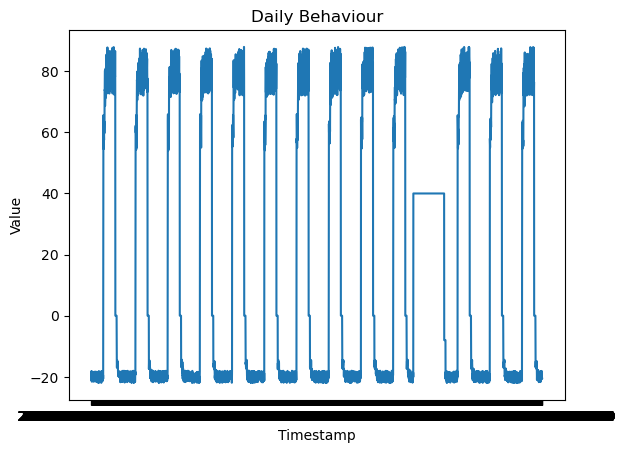

In [4]:
import matplotlib.pyplot as plt

# Visualize NYC Taxi data
plt.plot(data['timestamp'], data['value'])
plt.title('Daily Behaviour')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()


# Choose an algorithm to detect anomalies
Isolation Forest

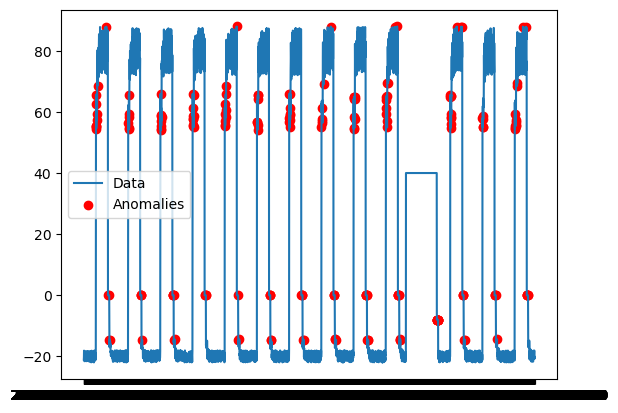

In [9]:
from sklearn.ensemble import IsolationForest

# Prepare data
data['value'] = data['value'].fillna(method='ffill')
values = data['value'].values.reshape(-1, 1)

# Fit Isolation Forest
model = IsolationForest(contamination=0.05, n_estimators=200)
data['anomaly'] = model.fit_predict(values)

# Visualize anomalies
plt.plot(data['timestamp'], data['value'], label='Data')
plt.scatter(data['timestamp'][data['anomaly'] == -1], 
            data['value'][data['anomaly'] == -1], 
            color='red', label='Anomalies')
plt.legend()
plt.show()


In [8]:
data.head()

,timestamp,value,anomaly
0,2014-04-01 00:00:00,-21.048383,1
1,2014-04-01 00:05:00,-20.295477,1
2,2014-04-01 00:10:00,-18.127229,1
3,2014-04-01 00:15:00,-20.171665,1
4,2014-04-01 00:20:00,-21.223762,1


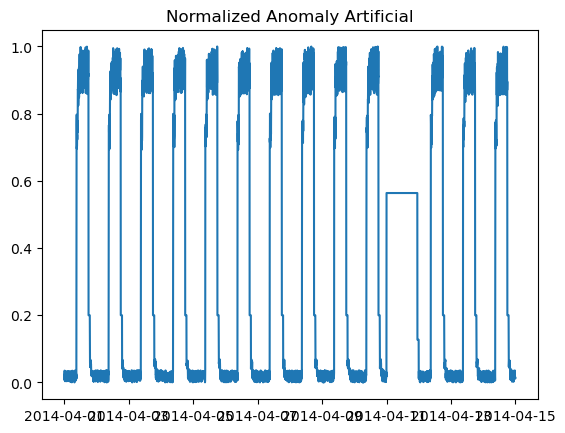

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Normalize the values
scaler = MinMaxScaler()
data['value'] = scaler.fit_transform(data[['value']])

# Plot the data
plt.plot(data.index, data['value'])
plt.title('Normalized Anomaly Artificial')
plt.show()